In [1]:
%matplotlib inline

import numpy as np
from base.classifiers import OnevsallContinuous
import glob
import pandas as pd

import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mplcolors

from base.plotting import plot_polar

from base import img_tools


import pylab

from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/datasets/abs_60topics_filt_jul.pkl")

In [2]:
posterior_reg = [6, 3]
posterior_labs = ['SMAc', 'SMAr']

middle_reg = [9, 5, 1, 7]
middle_labs = ['pSMAc', 'pSMAr', 'dACCc', 'dACCr']

anterior_reg = [2, 4, 8]
anterior_labs = ['dmPFC', 'rACC', 'vmPFC']

reg_num = posterior_reg + middle_reg + anterior_reg
label_names = posterior_labs + middle_labs + anterior_labs

label_order = zip(reg_num, label_names)
                              
roi_labels = [(38, 'dSomatosensory'), (14, '    dMotor'), (36, 'Putamen'), (11, 'pCC/AG'), (29, 'daInsula'), (37, 'IPL / SII'), (23, 'Amygdala'), (16, 'vMotor'), (24, 'Superior Parietal'), (17, 'pInsula'), (3, 'Thalamus'),(9, 'Temporal'), (34, 'lpOFC'), (39, 'Caudate'), (19, 'IPL'),(12, 'IFJ'), (21, 'IFG (L)'), (28, 'supPar'), (1, 'preCun'), (10, 'NAcc'), (7, 'Primary Motor'), (13, 'TPJ'), (27, 'SupPar/MFG/FP')]
roi_labels = roi_labels + [(2, 'Lateral Occipital'), (4, 'Visual Cortex'), (8, 'Anterior LPFC'), (15, 'Superior Temporal Gyrus'), (22, 'vaInsula'), (31, 'Hipp'), (32, 'Brain Stem'), (33, 'Superior Lateral Occipital'), (35, 'Crap')] 
mFC_rois = [20, 5, 30, 27, 11, 25]

In [3]:
nine_colors = [(0.89411765336990356, 0.10196078568696976, 0.10980392247438431),
 (0.65845446095747107, 0.34122261685483596, 0.1707958535236471),
   (1.0, 0.50591311045721465, 0.0031372549487095253),
 (0.21602460800432691, 0.49487120380588606, 0.71987698697576341),
 (0.30426760128900115, 0.68329106055054012, 0.29293349969620797),
               (0.400002384185791, 0.4000002384185791, 0.40000002384185791), 

 (0.60083047361934883, 0.30814303335021526, 0.63169552298153153),
       
               (0.99850826852461868, 0.60846600392285513, 0.8492888871361229),
    (0.99315647868549117, 0.9870049982678657, 0.19915417450315812)
 
 ]

In [4]:
zscore = lambda x: (x - x.mean()) / x.std()

In [5]:
coactivation = []
for i in range(1, 10):
    reg_coact = img_tools.extract_roi('../masks/new_neurosynth/whole_brain_k_means/whole_brain_kmeans_k40/cluster_labels.nii.gz',
                            '../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/coactivation/cluster_' + str(i) + '_pAgF_z.nii.gz',
                            dataset.masker)
    reg_coact['region'] = i
    coactivation.append(reg_coact)
    
coactivation = pd.concat(coactivation)
coactivation.roi = coactivation.roi.round().astype('int')

In [6]:
# Remove mFC
coactivation = coactivation[np.invert(np.in1d(coactivation.roi, mFC_rois))]

In [7]:
coactivation['region_names'] = coactivation['region'].map(dict(label_order))
coactivation['roi_names'] = coactivation['roi'].map(dict(roi_labels))

In [8]:
coactivation['zvalue'] = zscore(coactivation.value)

In [9]:
coactivation['zvaluebg'] = coactivation.groupby('region').transform(zscore).zvalue

In [10]:
plot_data = pd.pivot_table(coactivation, values='zvaluebg', index=['roi_names'], columns=['region_names'])

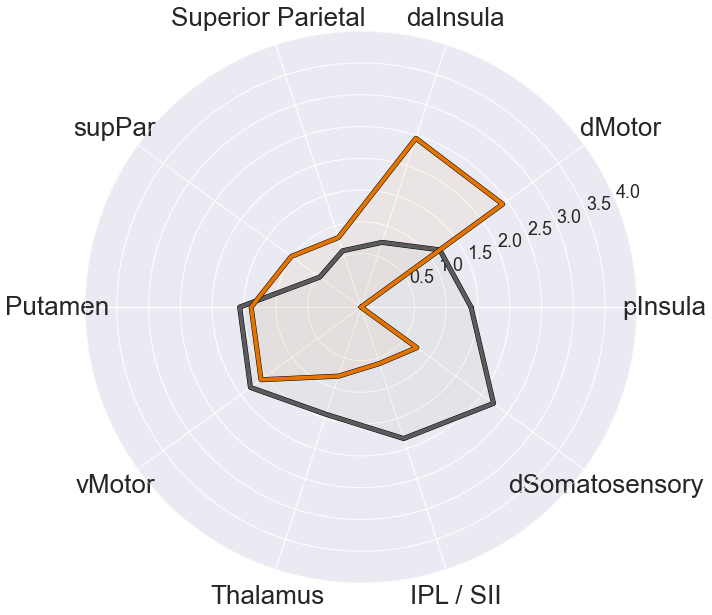

In [22]:
mask = posterior_reg
cmap = [n[0] for n in zip(np.array(nine_colors)[np.array(mask)-1], mask)]
plot_polar(plot_data[posterior_labs], overplot=True, n_top=6,palette=cmap, max_val=4)
plt.savefig('../reports/papers/mFC/Posterior_coact_polar_5_norm_top.pdf', bbox_inches='tight')

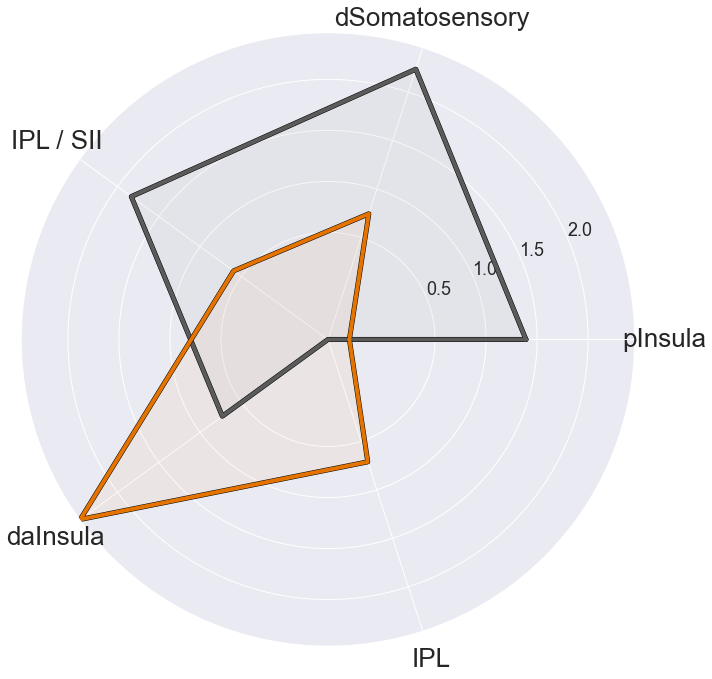

In [21]:
mask = posterior_reg
cmap = [n[0] for n in zip(np.array(nine_colors)[np.array(mask)-1], mask)]
plot_polar(plot_data[posterior_labs], overplot=True, n_top=5, selection='std', palette=cmap)
plt.savefig('../reports/papers/mFC/Posterior_coact_polar_3_norm_var.pdf', bbox_inches='tight')

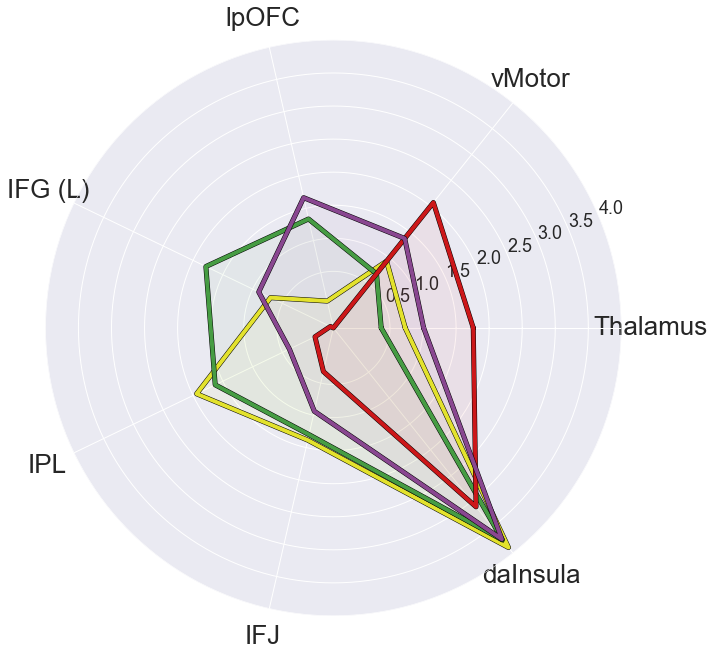

In [19]:
mask = middle_reg
cmap = [n[0] for n in zip(np.array(nine_colors)[np.array(mask)-1], mask)]
plot_polar(plot_data[middle_labs], overplot=True, n_top=3, palette=cmap, metric='correlation', max_val=4)
plt.savefig('../reports/papers/mFC/Middle_coact_polar_3_norm_TOP.pdf', bbox_inches='tight')

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

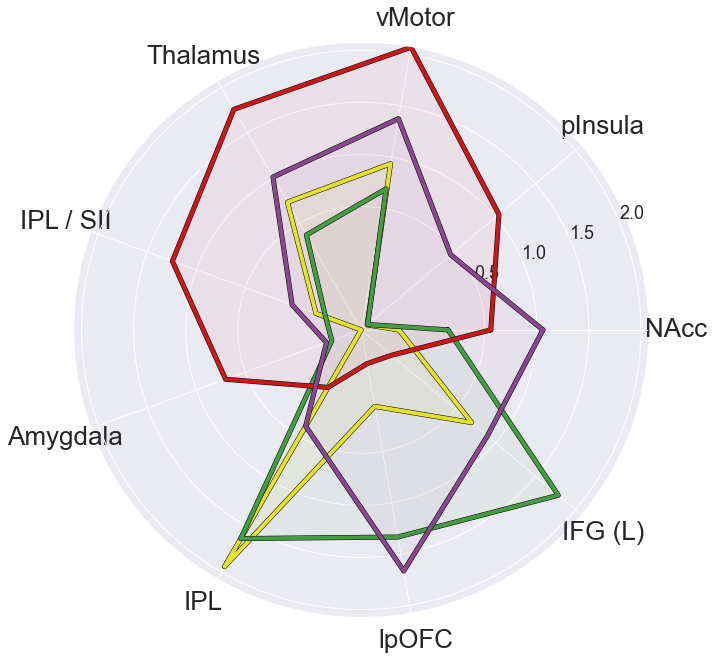

In [23]:
mask = middle_reg
cmap = [n[0] for n in zip(np.array(nine_colors)[np.array(mask)-1], mask)]
plot_polar(plot_data[middle_labs], overplot=True, n_top=9, palette=cmap, selection='std', metric='correlation')
# plt.savefig('../reports/papers/mFC/Middle_coact_polar_3_norm_var.pdf', bbox_inches='tight')

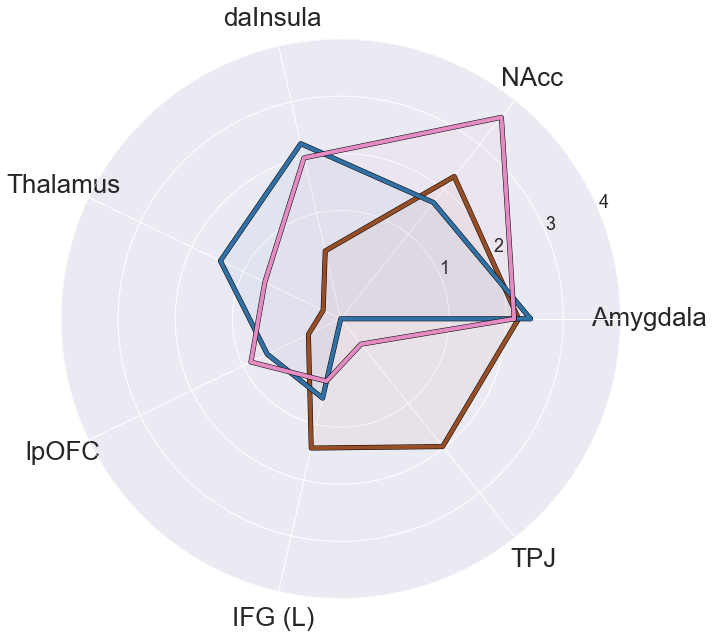

In [20]:
mask = anterior_reg
cmap = [n[0] for n in sorted(zip(np.array(nine_colors)[np.array(mask)-1], mask), key=lambda tup: tup[1])]
plot_polar(plot_data[anterior_labs], overplot=True, n_top=4, palette=cmap, max_val=4)
plt.savefig('../reports/papers/mFC/Anterior_coact_polar_4_norm_top.pdf', bbox_inches='tight')

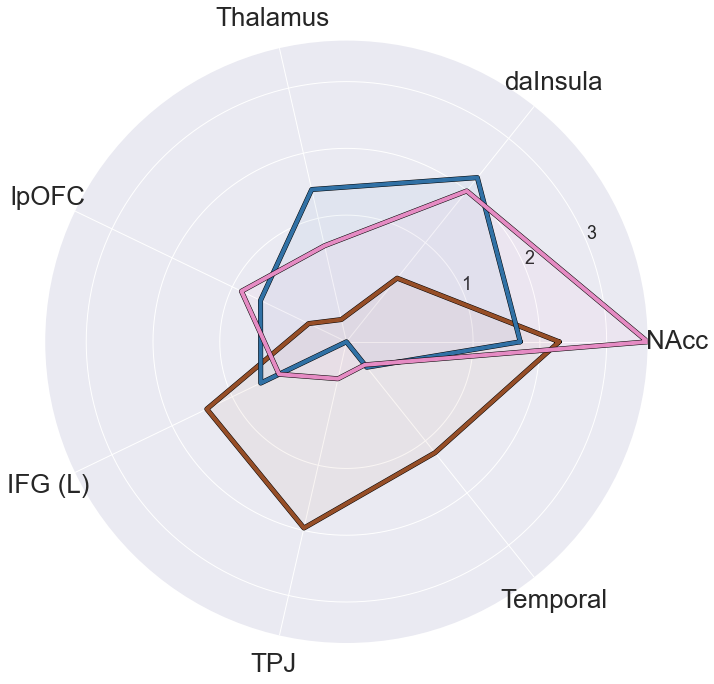

In [25]:
mask = anterior_reg
cmap = [n[0] for n in sorted(zip(np.array(nine_colors)[np.array(mask)-1], mask), key=lambda tup: tup[1])]
plot_polar(plot_data[anterior_labs], overplot=True, n_top=7, palette=cmap, selection='std')
plt.savefig('../reports/papers/mFC/Anterior_coact_polar_3_norm_var.pdf', bbox_inches='tight')